<a href="https://colab.research.google.com/github/RahafSh/EDA/blob/main/Week03Project_RahafShiqdar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Listings & Review** `Week 03 Project`

###Course End Project: Data Analysis Module
###Exploratory Data Analysis
####*Rahaf Shiqdar - Atheer Alessa*
----
##**Learning Objectives:**


* Dataset Overview
  1.  Data Loading and Initial Exploration
  2.  Data Cleaning
  3.  Exploratory Data Analysis
  4.  Feature Engineering
  5.  Conclusion
* Save Cleaned Data and Download it

----



#**Dataset Overview**
Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

-	Dataset contain 4 csv files.
-	Listing file include 33 column and 279712 rows.
-	Reviews file include 4 columns and 5373143 rows.
-	The other two are data dictionaries: [ Listings_data_dictionary & Reviews_data_dictionary].

**Loading the dataset:**  [Click here](https://drive.google.com/file/d/1vg8qooCFzBsuS33IdQPhZqTwnTNIHOzs/view)

In [ ]:
##Import libraries & packages - Python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # date time
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

from google.colab import drive
drive.mount('/content/drive')
 # magic command that allows plots generated by matplotlib to be displayed directly within the notebook
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  1.  Data Loading and Initial Exploration


      •	Load the selected dataset into  your preferred data analysis environment.





In [ ]:
#Load the dataset & Use the Pandas method read_csv() to load the data from the csv file.

# Listings
listing = pd.read_csv("/content/drive/MyDrive/Airbnb listings and review dataset (1)/Airbnb Data/Listings.csv", encoding='latin-1', low_memory = False)

In [ ]:
listing_ = pd.read_csv("/content/drive/MyDrive/Airbnb listings and review dataset (1)/Airbnb Data/Listings_data_dictionary.csv", encoding = 'latin', low_memory = False)

In [ ]:
# Reviews
review = pd.read_csv("/content/drive/MyDrive/Airbnb listings and review dataset (1)/Airbnb Data/Reviews.csv", encoding = 'latin-1', low_memory = False)

In [ ]:
review_ = pd.read_csv("/content/drive/MyDrive/Airbnb listings and review dataset (1)/Airbnb Data/Reviews_data_dictionary.csv", encoding = 'latin', low_memory = False)

      •	Explore the structure of the dataset (number of rows and columns, data types, etc.).


Understanding the dataset

In [ ]:
# Check the shape of the DataFrame
print("Number of rows in Listings:", listing.shape[0])
print("Number of columns:", listing.shape[1])

Number of rows in Listings: 279712
Number of columns: 33


In [ ]:
# another way simpler to display total of rows and features
listing.shape

(279712, 33)

In [ ]:
# Show columns
listing.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [ ]:
listing_.shape

(33, 2)

In [ ]:
review.shape

(5373143, 4)

In [ ]:
review.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id'], dtype='object')

In [ ]:
review_.shape

(4, 2)

      •	Examine the first few rows of the dataset to understand its contents.


In [ ]:
#Use the method head() to display the first five rows of the dataframe, but we can spcify a number also like here I choose 2!
listing.head(2)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
review.head(2)

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453


In [ ]:
listing.tail(2)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279711,40219504,Cosy apartment with view on Canal St Martin,6955618,2013-06-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
review.tail(2)

,listing_id,review_id,date,reviewer_id
5373141,47900451,727399287,2021-01-29,109011160
5373142,47998038,730320626,2021-02-11,276790978


In [ ]:
listing_.head()

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based


In [ ]:
review_.head()

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


# **Merge Schedules**

In [ ]:
Airbnb = pd.merge(listing, review, on='listing_id')

# Airbnb = listing.merge(review, how="inner",on="listing_id")

# Both methods, .merge() and pd.merge(), accomplish the same task of merging DataFrames based on common columns.
# The choice between them often comes down to personal preference and coding style.

Airbnb.head(2)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,172657766,2017-07-21,74346703


In [ ]:
Airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'review_id', 'date', 'reviewer_id'],
      dtype='object')

##  2.  Data Cleaning

      •	Handle missing values appropriately (e.g., imputation, deletion, etc.).


Data Wrangling and Cleaning

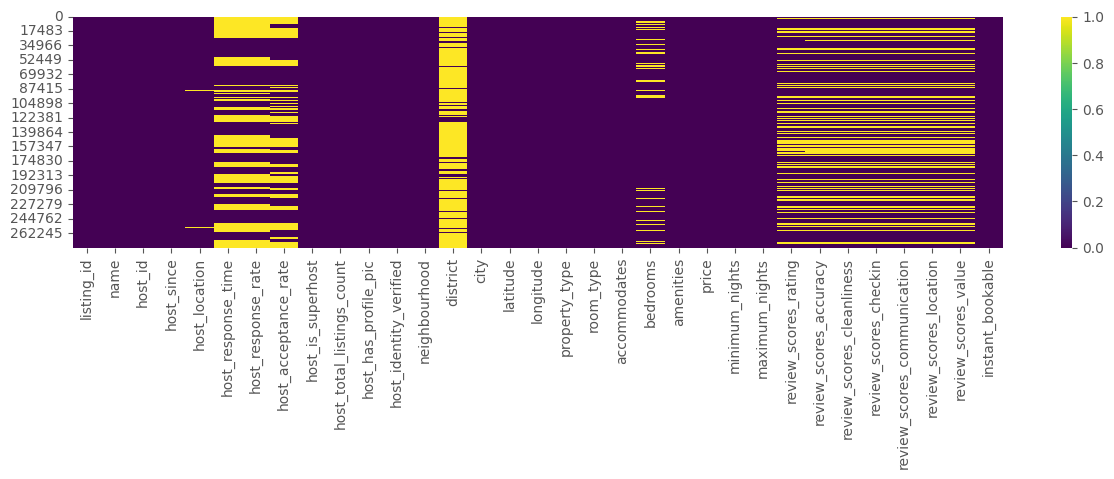

In [ ]:
# Check if there is any missing value through heatmap!
plt.rcParams['figure.figsize']=(15,3)
plt.style.use('ggplot')
sns.heatmap(listing.isnull(), cmap='viridis') # I couldn't do it on the merged table it crashed for huge data!
plt.show()

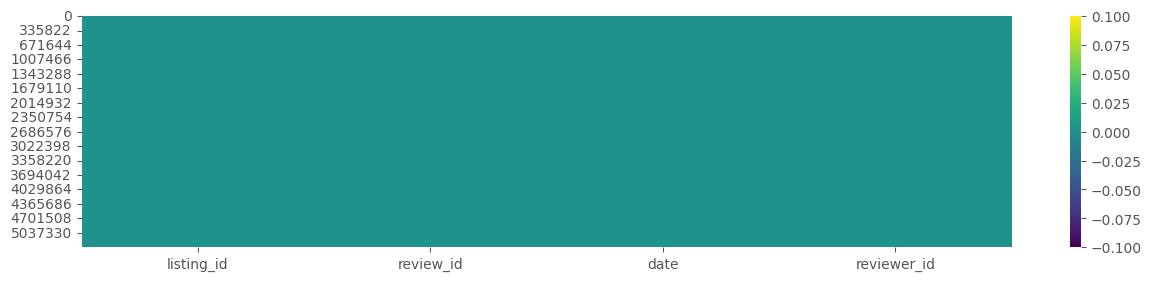

In [ ]:
plt.rcParams['figure.figsize']=(15,3)
plt.style.use('ggplot')
sns.heatmap(review.isnull(), cmap='viridis')
plt.show()

In [ ]:
Airbnb.isnull().sum()

listing_id                           0
name                               333
host_id                              0
host_since                        3939
host_location                     7910
host_response_time             1475633
host_response_rate             1475633
host_acceptance_rate            748437
host_is_superhost                 3939
host_total_listings_count         3939
host_has_profile_pic              3939
host_identity_verified            3939
neighbourhood                        0
district                       4525416
city                                 0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                        541413
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
review_scores_rating     

In [ ]:
# Total number of null values in the whole dataframe
Airbnb.isnull().sum().sum()

9036186

In [ ]:
Airbnb.shape

(5373143, 36)


> **Deletion / Imputation -> NULL Values**




In [ ]:
# Drop the whole column, the column will not help in the model!
Airbnb.drop(["host_response_time", "host_response_rate","host_acceptance_rate", "district", "review_id", "reviewer_id"], axis=1, inplace=True)

In [ ]:
Airbnb.isnull().sum()

listing_id                          0
name                              333
host_id                             0
host_since                       3939
host_location                    7910
host_is_superhost                3939
host_total_listings_count        3939
host_has_profile_pic             3939
host_identity_verified           3939
neighbourhood                       0
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                       541413
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating             6105
review_scores_accuracy          39263
review_scores_cleanliness       39071
review_scores_checkin           39338
review_scores_communication     39234
review_score

In [ ]:
if Airbnb['name'].isnull().any():
    Airbnb['name'].fillna(value='Unknown', inplace=True)

In [ ]:
if Airbnb[['host_location','host_is_superhost','host_total_listings_count','host_has_profile_pic',
          'host_identity_verified','bedrooms','review_scores_rating','review_scores_accuracy',
          'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
          'review_scores_location','review_scores_value']].isnull().any().any():
    Airbnb.fillna(method='ffill', inplace=True)

In [ ]:
Airbnb.isnull().sum()

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
date                           0
dtype: int

In [ ]:
#Change column name
Airbnb.rename(columns={'date': 'review_date'}, inplace=True)
Airbnb.head(2)

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_date
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2017-07-23
1,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2017-07-21


In [ ]:
Airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bedrooms', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'review_date'],
      dtype='object')

      •	Check for and handle any duplicate entries.



In [ ]:
# Drop any duplicates if there are any!
Airbnb = Airbnb.drop_duplicates()
Airbnb.dropna(inplace=True) # Drop rows that contains NAs, Note that now its a relatively small number of rows since we dropped the columns with large percentage of Nulls
print(f"The length after dropping nas: {len(Airbnb)}")

The length after dropping nas: 5342328


In [ ]:
Airbnb.duplicated().sum()

0

We do not have any duplicate rows in our dataset.



      •	Convert categorical variables into the appropriate data type if necessary.


In [ ]:
#Lets reduce the memory size by changing datatypes by converting object columns to categorical types
cat_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'instant_bookable']
Airbnb[cat_cols] = Airbnb[cat_cols].astype('category')

In [ ]:
# Change 'host_since' from object into datetime
Airbnb['host_since'] = pd.to_datetime(Airbnb['host_since'])
Airbnb['review_date'] = pd.to_datetime(Airbnb['review_date'])

In [ ]:
# Imputing missing values in datetime column (if any) , This step is usually not necessary for datetime columns but included for demonstration purposes
if Airbnb['host_since'].isnull().any():
    Airbnb['host_since'] = pd.date_range(start=Airbnb['host_since'].min(), end=Airbnb['host_since'].max(), periods=len(Airbnb))

In [ ]:
# Encoding datetime column (extracting features like year, month, day, etc.)
Airbnb['host_year'] = Airbnb['host_since'].dt.year
Airbnb['host_month'] = Airbnb['host_since'].dt.month
Airbnb['host_day'] = Airbnb['host_since'].dt.day

Airbnb['review_year'] = Airbnb['review_date'].dt.year
Airbnb['review_month'] = Airbnb['review_date'].dt.month
Airbnb['review_day'] = Airbnb['review_date'].dt.day

# Displaying the DataFrame after encoding datetime features
print("\nDataFrame after encoding datetime features:")
print(Airbnb)


DataFrame after encoding datetime features:
         listing_id                                               name  \
0            281420     Beautiful Flat in le Village Montmartre, Paris   
1            281420     Beautiful Flat in le Village Montmartre, Paris   
2           3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
3           3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
4           3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
...             ...                                                ...   
5373138    38683356            Nice and cosy mini-appartement in Paris   
5373139    38683356            Nice and cosy mini-appartement in Paris   
5373140    39659000  Charming apartment near Rue Saint Maur / Oberk...   
5373141    40219504        Cosy apartment with view on Canal St Martin   
5373142    40219504        Cosy apartment with view on Canal St Martin   

          host_id host_since                 host_location host_is

In [ ]:
Airbnb.nunique()

listing_id                     193556
name                           186642
host_id                        132475
host_since                       4199
host_location                    5558
host_is_superhost                   2
host_total_listings_count         169
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     631
city                               10
latitude                        82004
longitude                       91549
property_type                     126
room_type                           4
accommodates                       16
bedrooms                           34
amenities                      178865
price                            4098
minimum_nights                    149
maximum_nights                    453
review_scores_rating               63
review_scores_accuracy              9
review_scores_cleanliness           9
review_scores_checkin               9
review_scores_communication         9
review_score

Notable that we have 10 cities in dataset and 4 room types, and 14 years.






 ## 3.  Exploratory Data Analysis


      •	Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).


Data Analysis and Visualization


#Host ID

In [ ]:
Airbnb.host_id.value_counts().iloc[:5]

291007369    11030
2107478       6562
91265490      6540
316068        5070
23532561      4925
Name: host_id, dtype: int64

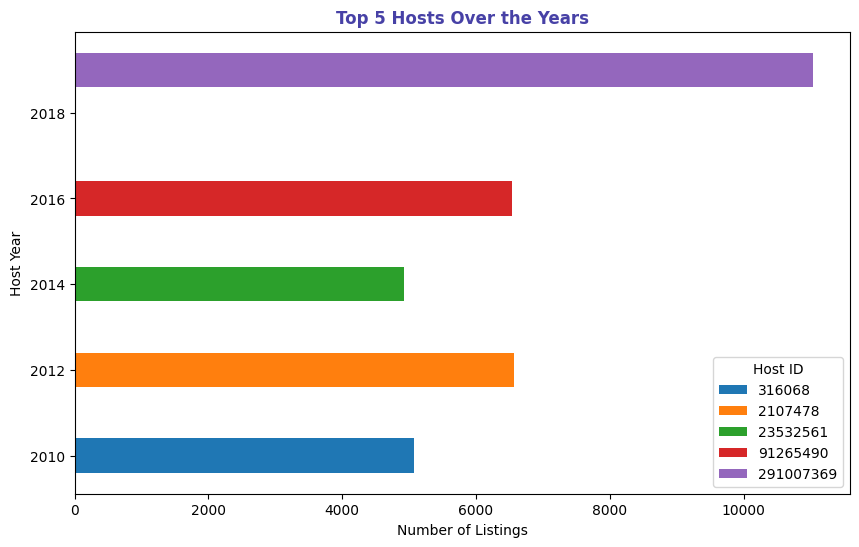

In [ ]:
# Group by both year and host ID, then count the occurrences
host_year_counts = Airbnb.groupby(['host_year', 'host_id']).size().reset_index(name='count')

# Sort by count and select the top 5 hosts
top_hosts = host_year_counts.groupby('host_id')['count'].sum().nlargest(5).index

# Filter the dataframe for the top 5 hosts
top_hosts_data = host_year_counts[host_year_counts['host_id'].isin(top_hosts)]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
for host_id, data in top_hosts_data.groupby('host_id'):
    plt.barh(data['host_year'], data['count'], label=host_id)

plt.xlabel('Number of Listings')
plt.ylabel('Host Year')
plt.title('Top 5 Hosts Over the Years', color='#4741A6',weight="bold")
plt.legend(title='Host ID')
plt.show()


We can observe that the highest times transaction done by a customer is 11030 in around the year of 2019.



Intresting to note that in our merged dataset, most people around 45k (74%) choose to use a house while around 10k(24%) for a private room. and 1k(2%) people choose a hotel room. Only less than 0.5k (1%) choose shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc...



# Room Type

In [ ]:
# Noted above that the room_type is only of 4 particular types.
Airbnb['room_type'].value_counts()

Entire place    3928820
Private room    1270994
Hotel room       102688
Shared room       39826
Name: room_type, dtype: int64

<Axes: title={'center': 'Most Chosen Room Type'}, ylabel='room_type'>

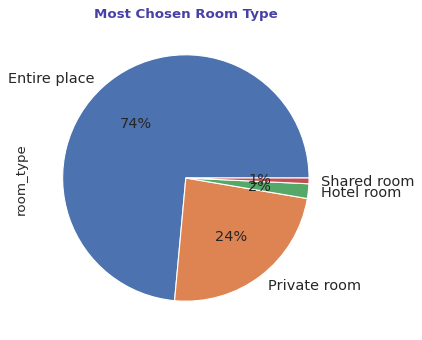

In [ ]:
# Pie Chart
fig = plt.figure(figsize=(5,5), dpi=80)
plt.title('Most Chosen Room Type', color='#4741A6',weight="bold")
Airbnb['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

# City - Location


In [ ]:
Airbnb['city'].value_counts()

Paris             1202486
Rome              1111460
New York           841223
Mexico City        476590
Sydney             475950
Rio de Janeiro     322917
Cape Town          302005
Bangkok            282521
Istanbul           193689
Hong Kong          133487
Name: city, dtype: int64

<Axes: title={'center': 'City Most Transactions'}, ylabel='city'>

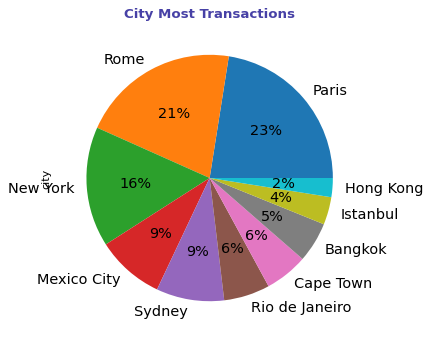

In [ ]:
# Pie Chart
fig = plt.figure(figsize=(5,5), dpi=80)
plt.title('City Most Transactions', color='#4741A6',weight="bold")

Airbnb['city'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

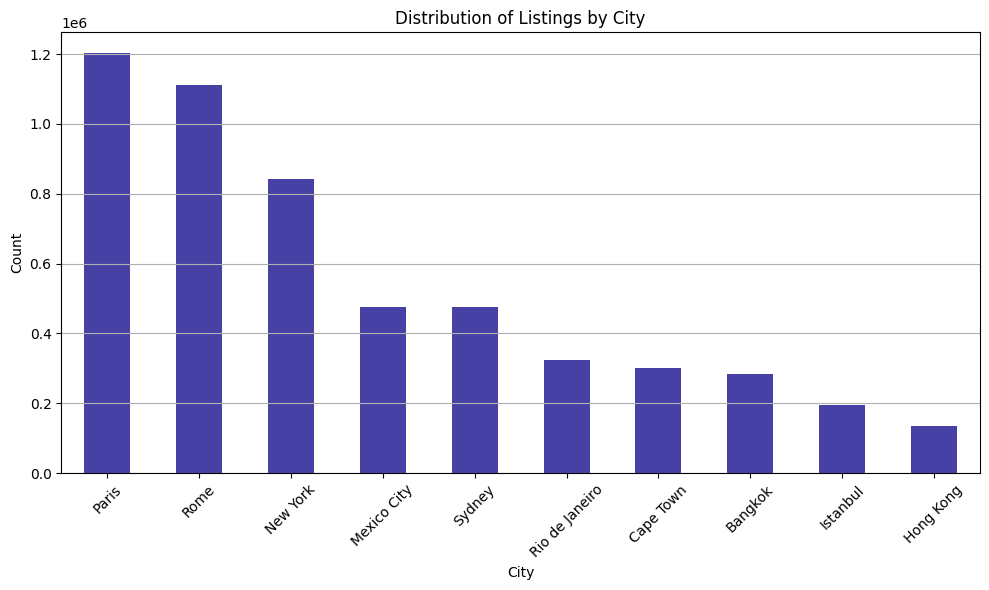

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
Airbnb['city'].value_counts().plot(kind='bar', color='#4741A6')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Listings by City')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Paris is the city where most Airbnb transactions have occured with 23% of entire dataset. The least happend in Hong Kong only 2%. Rome consisted on 21% of transactions. etc...



# Neighbourhood

In [ ]:
Airbnb['neighbourhood'].value_counts().iloc[:5]

I Centro Storico     736215
Cuauhtemoc           251030
Sydney               159734
Copacabana           128609
Buttes-Montmartre    117684
Name: neighbourhood, dtype: int64

In [ ]:
Airbnb['neighbourhood'].unique()

['Buttes-Montmartre', 'Elysee', 'Vaugirard', 'Passy', 'Temple', ..., 'Coelho Neto', 'Realengo', 'Abolicao', 'New Dorp', 'Piedade']
Length: 631
Categories (631, object): ['Abolicao', 'Adalar', 'Allerton', 'Alto da Boa Vista', ..., 'Yan na wa',
                           'Yau Tsim Mong', 'Yuen Long', 'Zeytinburnu']

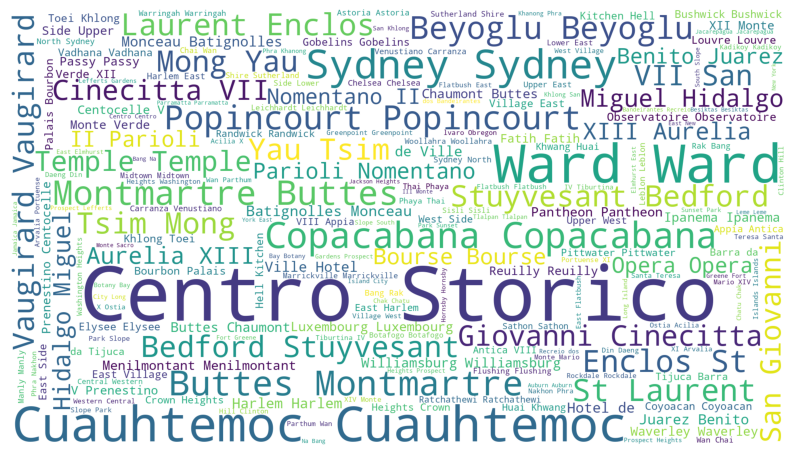

In [ ]:
# Word Cloud
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(Airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: ylabel='neighbourhood'>

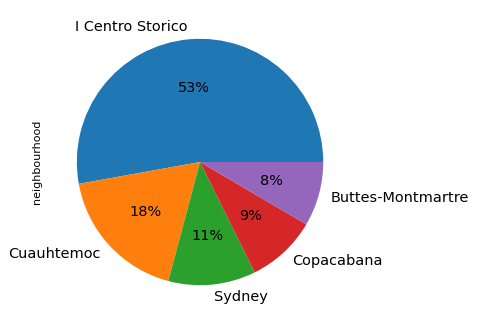

In [ ]:
# Pie Chart
fig = plt.figure(figsize=(5,5), dpi=80)
Airbnb['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

We can see above that I Centro Storico is the hottest area of transaction followed by Cuauhtemoc.

This pie-chart shows the top 5 areas by percentage in the dataset.

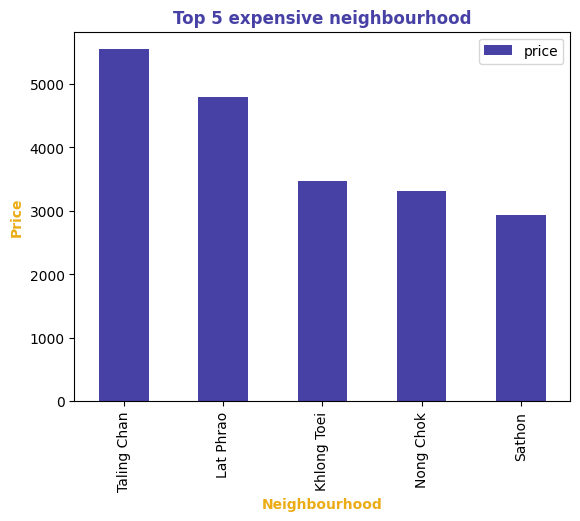

In [ ]:
# Bar plot
Airbnb.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:5].plot.bar(color='#4741A6')
plt.title('Top 5 expensive neighbourhood', color='#4741A6',weight="bold")
plt.ylabel('Price', color='#ebac17',weight="bold")
plt.xlabel('Neighbourhood', color='#ebac17',weight="bold")
plt.legend().set_visible(True)


We can see above that Taling Chan is the most expensive area followed by Lat Phrao.

This plot shows the top 5 with the highest price neighbourhood in the dataset.

# Price

In [ ]:
Airbnb.price.value_counts().iloc[:10]

50     118242
80     113904
60     112044
70     103862
100     99139
90      89494
65      85270
75      83588
55      83012
40      78473
Name: price, dtype: int64

Text(0, 0.5, 'Frequency')

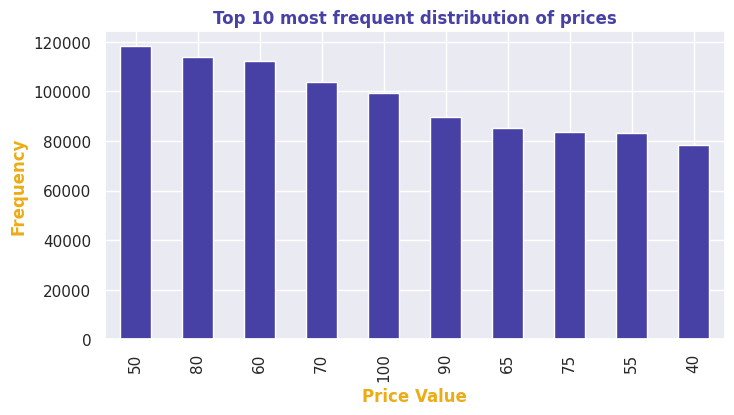

In [ ]:
plt.figure(figsize=(8, 4))
Airbnb.price.value_counts().iloc[:10].plot(kind = 'bar', color='#4741A6')
plt.title('Top 10 most frequent distribution of prices', color='#4741A6',weight="bold")
plt.xlabel('Price Value', color='#ebac17',weight="bold")
plt.ylabel('Frequency', color='#ebac17',weight="bold")

Distribution of the top 10 most frequent prices in the Airbnb dataset. Each bar represents a unique price value, and the height of the bar corresponds to the frequency of occurrence of that price. The bars in the plot represent the frequency of each price, and the x-axis indicates the price values.

In [ ]:
Airbnb.price.describe()

count    5.342328e+06
mean     3.965100e+02
std      2.425830e+03
min      8.000000e+00
25%      6.600000e+01
50%      1.150000e+02
75%      3.300000e+02
max      3.001770e+05
Name: price, dtype: float64

The average pricing is around 396.51 dollars.

50% of data has price greater than 115 dollars.

The costliest airbnb has around 300,177.00 dollars as price.

Here's how to interpret it:
The "e+02" indicates that you move the decimal point 2 places to the right (positive exponent), resulting in the number being multiplied by 10^2, which is 100.
So, 3.965100e+02 is equivalent to 396.51

In [ ]:
Airbnb[Airbnb['price'] == 3.001770e+05]

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_location,review_scores_value,instant_bookable,review_date,host_year,host_month,host_day,review_year,review_month,review_day
2383917,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2019-09-08,2012,11,2,2019,9,8
2383918,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2019-11-03,2012,11,2,2019,11,3
2383919,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2019-12-15,2012,11,2,2019,12,15
2383920,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2019-11-10,2012,11,2,2019,11,10
2383921,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2019-12-29,2012,11,2,2019,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384127,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2020-01-10,2012,11,2,2020,1,10
2384128,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2020-01-14,2012,11,2,2020,1,14
2384129,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2020-01-18,2012,11,2,2020,1,18
2384130,3410763,Amazing view and pool in center Bkk,4039620,2012-11-02,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",t,2.0,t,f,Khlong Toei,...,9.0,10.0,f,2020-01-21,2012,11,2,2020,1,21


In [ ]:
# Filter DataFrame based on the condition price == 3.001770e+05
filtered_df = Airbnb[Airbnb['price'] == 3.001770e+05]

# Select specific columns from the filtered DataFrame
specific_columns = ['room_type', 'price']
df_specific = filtered_df[specific_columns]

print(df_specific)


            room_type   price
2383917  Private room  300177
2383918  Private room  300177
2383919  Private room  300177
2383920  Private room  300177
2383921  Private room  300177
...               ...     ...
2384127  Private room  300177
2384128  Private room  300177
2384129  Private room  300177
2384130  Private room  300177
2384131  Private room  300177

[214 rows x 2 columns]


In [ ]:
# Count the occurrences of each unique value in the 'room_type' column of the filtered DataFrame
room_type_counts = filtered_df['room_type'].value_counts()
print(room_type_counts)

Private room    214
Entire place      0
Hotel room        0
Shared room       0
Name: room_type, dtype: int64


We have 214 airbnbs with 300,177 per night luxury stay of private room.

Text(0, 0.5, 'Frequency')

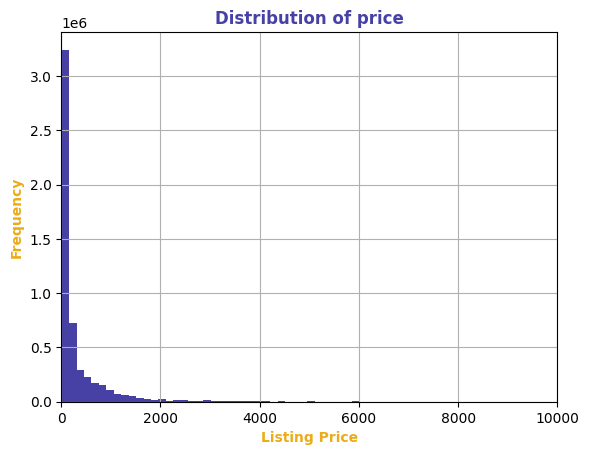

In [ ]:
# Histogram
Airbnb['price'].hist(bins=2000,color='#4741A6')
plt.xlim(0,10000)
plt.title('Distribution of price', color='#4741A6',weight="bold")
plt.xlabel('Listing Price', color='#ebac17',weight="bold")
plt.ylabel('Frequency', color='#ebac17',weight="bold")

The majority of hosts have prices ranging between 0 and 4000.



      •	Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).


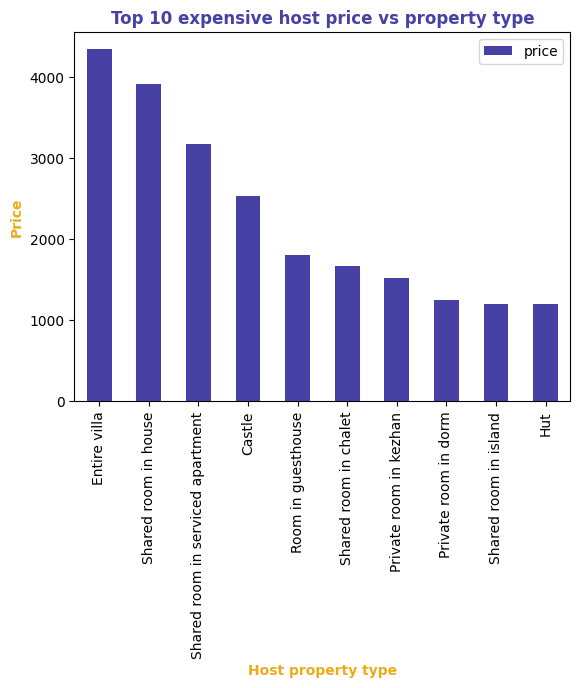

In [ ]:
# Bar Plot
Airbnb.groupby(['property_type'])['price'].mean().sort_values(ascending=False)[:10].plot.bar(color='#4741A6')
plt.title('Top 10 expensive host price vs property type', color='#4741A6',weight="bold")
plt.ylabel('Price', color='#ebac17',weight="bold")
plt.xlabel('Host property type', color='#ebac17',weight="bold")
plt.legend().set_visible(True)

We can see above that Entire Villa is the most expensive property type followed by Shared room in house.

This plot shows the top 10 with the highest price property type in the dataset.

In [ ]:
average_price_by_city = Airbnb.groupby('city')['price'].mean().sort_values()
# Display the average prices for accommodations in each city
print(average_price_by_city)

city
Rome                81.322391
Paris              108.569200
New York           121.838998
Sydney             198.522410
Rio de Janeiro     356.759341
Istanbul           373.271461
Hong Kong          659.643299
Mexico City        968.549986
Cape Town         1428.194699
Bangkok           1882.646936
Name: price, dtype: float64


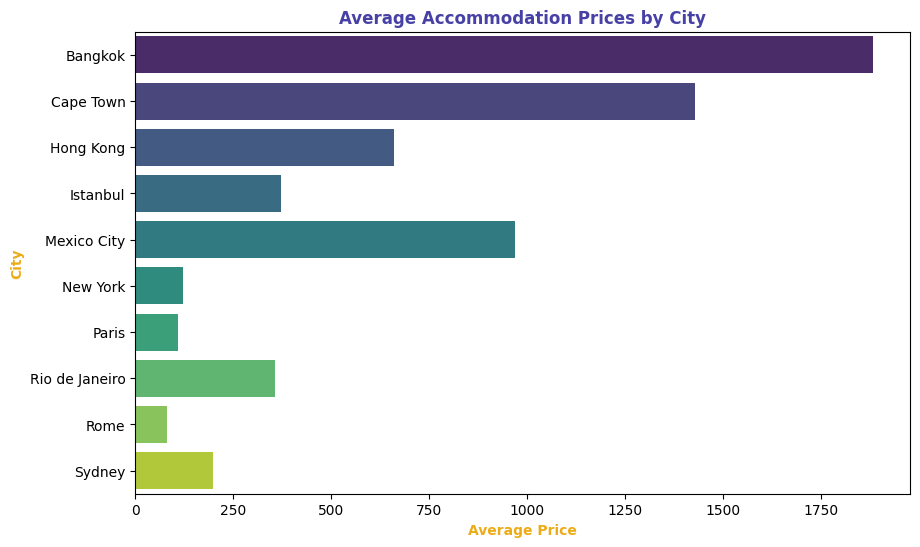

In [ ]:
plt.figure(figsize=(10, 6))
# Create a bar plot of average prices by city
sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index, hue=average_price_by_city.index, palette='viridis', dodge=False, legend=False)

plt.xlabel('Average Price', color='#ebac17', weight="bold")
plt.ylabel('City', color='#ebac17', weight="bold")
plt.title('Average Accommodation Prices by City', color='#4741A6', weight="bold")
plt.show()



      •	Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).




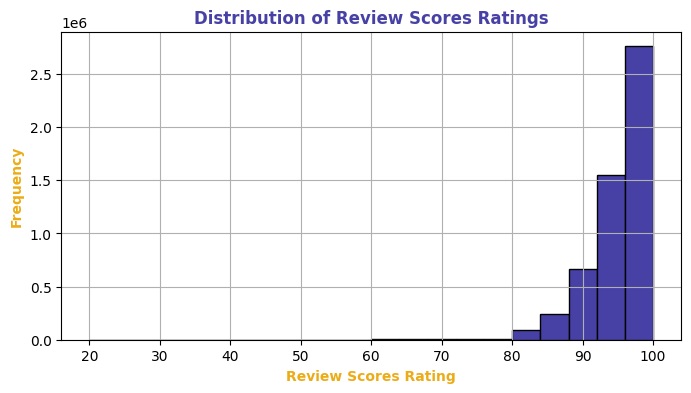

In [ ]:
# Create a histogram for the 'review_scores_rating' column
plt.figure(figsize=(8, 4))
plt.hist(Airbnb['review_scores_rating'].dropna(), bins=20, color='#4741A6', edgecolor='black')
plt.xlabel('Review Scores Rating', color='#ebac17',weight="bold")
plt.ylabel('Frequency', color='#ebac17',weight="bold")
plt.title('Distribution of Review Scores Ratings', color='#4741A6',weight="bold")
plt.grid(True)
plt.show()

In this plot above shows the distribution of review scores ratings in the Airbnb dataset, allowing for a better understanding of how ratings are distributed across different values.

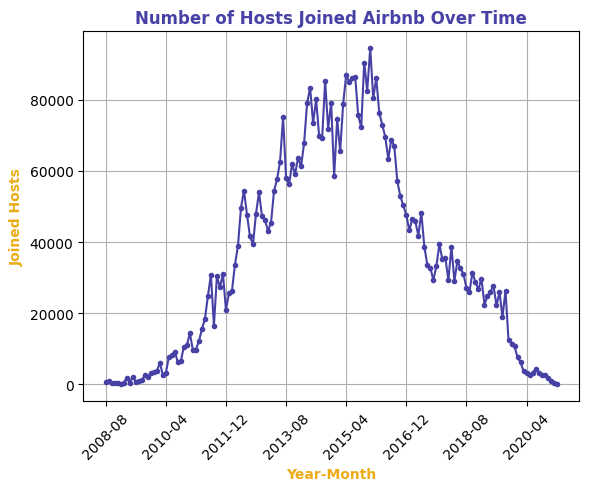

In [ ]:
# Combine host_year and host_month into year_month column
Airbnb['year_month'] = Airbnb['host_year'].astype(str) + '-' + Airbnb['host_month'].astype(str).str.zfill(2)

# Count the hosts joined each month
hosts_per_month = Airbnb['year_month'].value_counts().sort_index()

# Plot the trend of hosts joining
hosts_per_month.plot(kind='line', marker='.', color='#4741A6')
plt.title('Number of Hosts Joined Airbnb Over Time', color='#4741A6', weight='bold')
plt.xlabel('Year-Month', color='#ebac17', weight='bold')
plt.ylabel('Joined Hosts', color='#ebac17', weight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



This visual combines the 'host_year' and 'host_month' columns into a new column named 'year_month' and then visualizes the trend of hosts joining Airbnb over time using a line plot

There is a huge increase in the number of hosts joining Airbnb between the years of 2015 to 2017.

that helps track the growth of hosts joining Airbnb over time, providing insights into the platform's expansion and popularity.




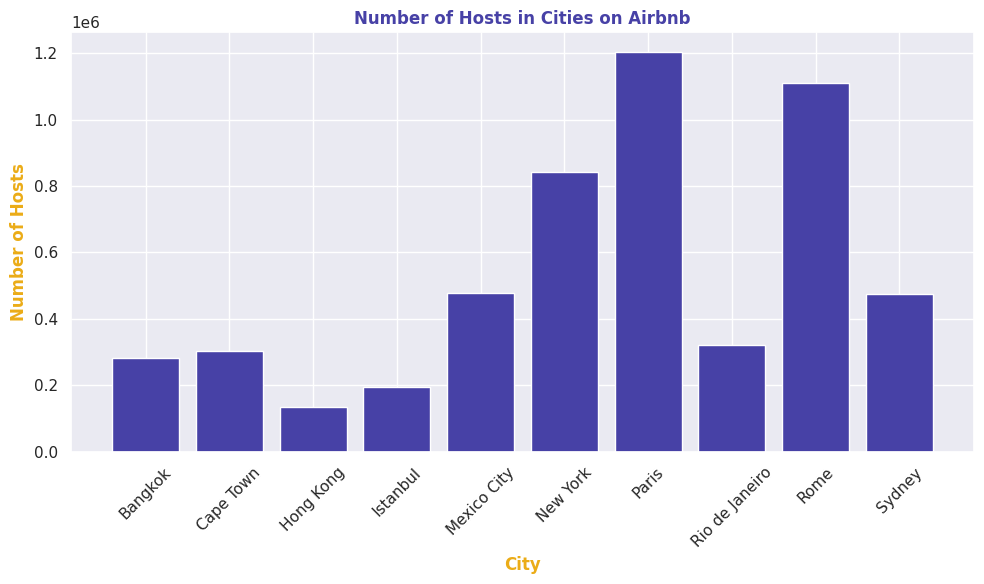

In [ ]:
# Create pivot table to count listings by city
pivot_table = pd.pivot_table(data=Airbnb, index='city', values='listing_id', aggfunc='count').sort_values(by='city')

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table['listing_id'], color='#4741A6')
plt.title('Number of Hosts in Cities on Airbnb', color='#4741A6', weight='bold')
plt.xlabel('City', color='#ebac17', weight='bold')
plt.ylabel('Number of Hosts', color='#ebac17', weight='bold')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


 This one visualize the distribution of Airbnb hosts across different cities, providing insights into the platform's geographical coverage and popularity in various locations.

In [ ]:
date_bookings = Airbnb['review_date'].value_counts().sort_values(ascending = False)
date_bookings

2020-01-02    10088
2020-01-01     9594
2019-10-06     9355
2019-11-03     8862
2019-09-29     8852
              ...  
2010-02-25        1
2009-12-28        1
2009-07-04        1
2009-05-28        1
2010-06-03        1
Name: review_date, Length: 4103, dtype: int64

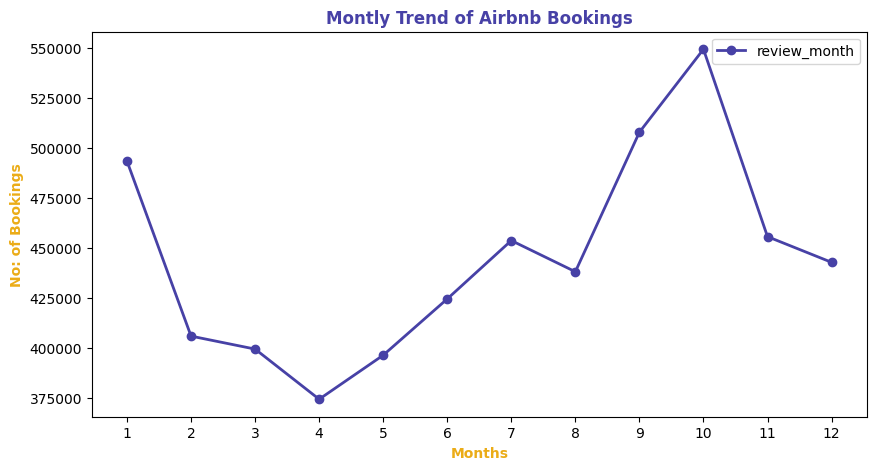

In [ ]:
Airbnb.groupby('review_month').agg('review_month').count().to_frame().plot(kind = 'line', figsize = (10,5), linewidth=2, marker='o', color = '#4741A6')
plt.title('Montly Trend of Airbnb Bookings', color='#4741A6', weight='bold')
plt.xlabel('Months', color='#ebac17', weight='bold')
plt.ylabel('No: of Bookings', color='#ebac17', weight='bold')
plt.xticks(range(1,13))
plt.show()

Number of room bookings was increased during the months of *September* [9] and October [10].



      •	Calculate summary statistics for relevant variables.




In the months of September and October enormous number of rooms booked with airbnb about 10088 rooms in a single day of 2020-01-02.



In [ ]:
# pandas method is used to generate descriptive statistics of a DataFrame or Series. it provides summary statistics for each numerical column by default.
Airbnb.describe()

,listing_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_year,host_month,host_day,review_year,review_month,review_day
count,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,...,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06,5.342328e+06
mean,1.598114e+07,6.427841e+07,6.993992e+00,2.430521e+01,3.756404e+00,3.453582e+00,1.577234e+00,3.965100e+02,5.932722e+00,1.375112e+05,...,9.822873e+00,9.815240e+00,9.742924e+00,9.459613e+00,2.014766e+03,6.517430e+00,1.554165e+01,2.017969e+03,6.664951e+00,1.562364e+01
std,1.196830e+07,7.788840e+07,2.602946e+01,2.982047e+01,6.940728e+01,2.024430e+00,1.167500e+00,2.425830e+03,3.284461e+01,1.675497e+07,...,4.888190e-01,5.012477e-01,5.304317e-01,6.433406e-01,2.212835e+00,3.397704e+00,8.793318e+00,1.672107e+00,3.484505e+00,8.916794e+00
min,2.577000e+03,1.822000e+03,0.000000e+00,-3.426440e+01,-9.933963e+01,1.000000e+00,1.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.008000e+03,1.000000e+00,1.000000e+00,2.008000e+03,1.000000e+00,1.000000e+00
25%,5.312697e+06,8.766456e+06,1.000000e+00,1.377335e+01,-4.339511e+01,2.000000e+00,1.000000e+00,6.600000e+01,1.000000e+00,4.500000e+01,...,1.000000e+01,1.000000e+01,1.000000e+01,9.000000e+00,2.013000e+03,4.000000e+00,8.000000e+00,2.017000e+03,4.000000e+00,8.000000e+00
50%,1.442109e+07,3.067206e+07,2.000000e+00,4.077210e+01,2.377180e+00,3.000000e+00,1.000000e+00,1.150000e+02,2.000000e+00,1.125000e+03,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,2.015000e+03,6.000000e+00,1.500000e+01,2.018000e+03,7.000000e+00,1.600000e+01
75%,2.404356e+07,9.382582e+07,5.000000e+00,4.190825e+01,1.838380e+01,4.000000e+00,2.000000e+00,3.300000e+02,3.000000e+00,1.125000e+03,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,2.016000e+03,9.000000e+00,2.300000e+01,2.019000e+03,1.000000e+01,2.300000e+01
max,4.826387e+07,3.893169e+08,7.235000e+03,4.890425e+01,1.513397e+02,1.600000e+01,5.000000e+01,3.001770e+05,9.999000e+03,2.147484e+09,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,2.021000e+03,1.200000e+01,3.100000e+01,2.021000e+03,1.200000e+01,3.100000e+01


 ## 4.  Feature Engineering


      •	Create new features that might be useful for analysis (e.g., average rating, occupancy rate, etc.).


In [ ]:
#Create a binary feature based on review sentiment
Airbnb['positive_review'] = Airbnb['review_scores_rating'] >= 90

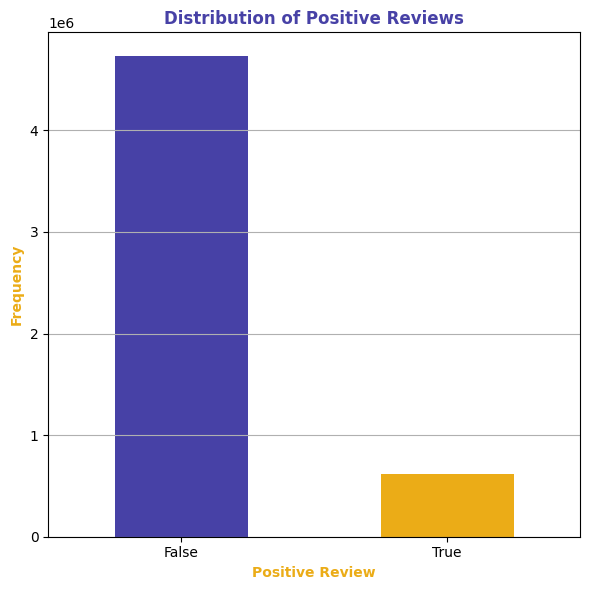

In [ ]:
# Count positive and negative reviews
positive_reviews_count = Airbnb['positive_review'].value_counts()

plt.figure(figsize=(6, 6))
positive_reviews_count.plot(kind='bar', color=['#4741A6', '#EBAC17'])
plt.title('Distribution of Positive Reviews', color='#4741A6', weight='bold')
plt.xlabel('Positive Review', color='#ebac17', weight='bold')
plt.ylabel('Frequency', color='#ebac17', weight='bold')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



      •	Encode categorical variables if necessary (e.g., one-hot encoding, label encoding, etc.).


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns for one-hot encoding
one_hot_cols = ['property_type', 'room_type']

# Columns for label encoding
label_cols = [col for col in cat_cols if col not in one_hot_cols]

# Perform one-hot encoding
Airbnb_one_hot_encoded = pd.get_dummies(Airbnb[one_hot_cols], columns=one_hot_cols)

# Perform label encoding
label_encoder = LabelEncoder()
Airbnb_label_encoded = Airbnb.copy()

for col in label_cols:
    Airbnb_label_encoded[col + "_encoded"] = label_encoder.fit_transform(Airbnb_label_encoded[col])

**Ordinal Encoding**

In [ ]:
# Limited number of unique values, unique() function to view the unique values
Airbnb['room_type'].unique()

['Entire place', 'Private room', 'Hotel room', 'Shared room']
Categories (4, object): ['Entire place', 'Hotel room', 'Private room', 'Shared room']

In [ ]:
Airbnb["room_type"]=Airbnb["room_type"].map({"Entire place":0,"Private room":1,"Hotel room":2,"Shared room":3})

**Binary Encoding**

In [ ]:
Airbnb['instant_bookable'].unique()

['f', 't']
Categories (2, object): ['f', 't']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Airbnb["instant_bookable"] = label_encoder.fit_transform(Airbnb["instant_bookable"])


In [ ]:
Airbnb["instant_bookable"]=Airbnb["instant_bookable"].map({"t":0,"f":1})

In [ ]:
Airbnb['host_is_superhost'].unique()

['f', 't']
Categories (2, object): ['f', 't']

In [ ]:
Airbnb["host_is_superhost"]=Airbnb["host_is_superhost"].map({"f":0,"t":1})

#**Conclusion**

<a id='conclusions'></a>

*	The year of the highest number more than 10k of transactions done by a host in airbnb is 2019.
*	74% of people choose to use an entire place as room type, it means most of them families or tour visitors maybe.
*	Paris is the city where most Airbnb transactions have occurred with 23% of entire dataset, followed by Rome with 21% and the least at Hong Kong 2%.
*	I Centro Storico Neighbourhood is the hottest area of transaction with 53%, followed by Cuauhtemoc 18%.
*	The top expensive neighbourhood is Taling Chan.
*	The average pricing is around 396.51 dollars.
*	The majority of hosts have prices ranging between 0 and 4000.
*	Top expensive host price of property type is the Entire Villa.
*	The average accommodation prices by city, the highest is Bangkok.
*	The frequency of distribution of review score rating between 60 to 100.
*	There is a huge increase in the number of hosts joining Airbnb between the years of 2015 to 2017.
*	Paris holds the highest number of hosts in cities on Airbnb.
*	Room bookings was increased during the months of *September* and *October*.


# **Save Cleaned Data and Download it**




In [ ]:
import pandas as pd

Airbnb.to_csv('Airbnb_New.csv', index=False)